# Exploratory Analysis over Federal Emergencies and Disasters

## Dataset Details

In this project, you will work on 63 years of Federal Disasters dataset. Specifically, you will work on database.csv file from kaggle repository (https://www.kaggle.com/fema/federal-disasters). The file database.csv contains 46,184 rows and 14 columns. This dataset begins with the year 1953, and runs up to the year 2017. Each row corresponds to an emergency declared by the president due to a natural disaster all around the US. The columns of the data-set are:
- Declaration Number - Unique number for each emergency declared
- Declaration Type - Type of declaration
- Declaration Date - Date of declaration
- State - State affected
- County - County affected
- Disaster Type 
- Disaster Title
- Start Date - The date event started
- End Date - The date event ended
- Close Date - End of Declaration
- Individual Assistance Program - Whether IAP was provided or not?
- Individuals & Households Program - Whether IHP was provided or not?
- Public Assistance Program - Whether PAP was provided or not?
- Hazard Mitigation Program - Whether HMP was provided or not?


## Required Python Packages 

In [2]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset
The Python code below reads the Federal Emergencies and Disasters dataset into a Pandas data frame with the name df_data. 
For this code to work, the file 'database.csv' must be in the same folder as this file.

In [3]:
#read the csv file into a Pandas data frame
df_data = pd.read_csv('database.csv', encoding='latin1')

#return the first 5 rows of the dataset
df_data.head()

,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program
0,DR-1,Disaster,05/02/1953,GA,NaN,Tornado,Tornado,05/02/1953,05/02/1953,06/01/1954,Yes,No,Yes,Yes
1,DR-2,Disaster,05/15/1953,TX,NaN,Tornado,Tornado and Heavy Rainfall,05/15/1953,05/15/1953,01/01/1958,Yes,No,Yes,Yes
2,DR-3,Disaster,05/29/1953,LA,NaN,Flood,Flood,05/29/1953,05/29/1953,02/01/1960,Yes,No,Yes,Yes
3,DR-4,Disaster,06/02/1953,MI,NaN,Tornado,Tornado,06/02/1953,06/02/1953,02/01/1956,Yes,No,Yes,Yes
4,DR-5,Disaster,06/06/1953,MT,NaN,Flood,Floods,06/06/1953,06/06/1953,12/01/1955,Yes,No,Yes,Yes


# Task 1: Statistical Exploratory Data Analysis
Let us start with getting to know the dataset. Your first task will be to get some basic information by using Pandas features.

In [8]:
#Print the details of the df_data data frame (information such as number of rows,columns, name of columns, etc)
print ("Details of df_data data frame are: \n") 
df_data.info()


# Find the number of rows and columns in the df_data data frame.
print(df_data.shape)
num_rows = len(df_data.axes[0])
num_cols = len(df_data.axes[1])
print ("\n\nNumber of rows:%s and number of columns:%s" % (num_rows, num_cols)) 


# Print the descriptive detail (count, unique, top, freq etc) for 'Start Date' column of the df_data 

print ("\n\nDescriptive details of 'Start Date' column are\n",df_data["Start Date"].describe())


# Print ALL the unique values of Disaster Title and Counties  .
disaster_title_list  = df_data['Disaster Title'].unique()
unique_county_list = df_data['County'].unique()


print("\n\n",disaster_title_list)
print("#####################################################")
print("\n\n",unique_county_list) 



Details of df_data data frame are: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46185 entries, 0 to 46184
Data columns (total 14 columns):
Declaration Number                  46185 non-null object
Declaration Type                    46185 non-null object
Declaration Date                    46185 non-null object
State                               46185 non-null object
County                              45988 non-null object
Disaster Type                       46185 non-null object
Disaster Title                      46185 non-null object
Start Date                          46185 non-null object
End Date                            45843 non-null object
Close Date                          35210 non-null object
Individual Assistance Program       46185 non-null object
Individuals & Households Program    46185 non-null object
Public Assistance Program           46185 non-null object
Hazard Mitigation Program           46185 non-null object
dtypes: object(14)
memory usage: 4.9+ MB
(

# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [9]:
#Find out the declaration titles of type 'Emergency' which lasted more than 120 days

df_data['date_diff'] = (pd.to_datetime(df_data['End Date']) - pd.to_datetime(df_data['Start Date']))/np.timedelta64(1,'D')
result=df_data[(df_data['date_diff'] > 120) & (df_data['Declaration Type'] == 'Emergency')]
Emergency_greater_120 = result['Disaster Title'].unique()

print (">> The declaration titles of type 'Emergency' which lasted more than 120 days are %s" 
       % (Emergency_greater_120))

#Find out the total number of declarations between 1998 and 1999 where Individual Assistance Program was provided for the state of Texas.

df_data['Declaration Date'] = pd.to_datetime(df_data['Declaration Date'])
date_range = df_data[(df_data['Declaration Date'] > '01/01/1998') & (df_data['Declaration Date'] <= '12/31/1999')]
num_declarations_1998_1999 = len(date_range[(date_range['Individual Assistance Program'] == 'Yes') & (date_range['State'] == 'TX')])

print ("\n\n>> The total number of declarations in 1998-1999 for the state of Texas were %s" 
       % (num_declarations_1998_1999))


#Find out the top 10 counties with the declaration type 'Disaster' and 'Emergency' for all years.
n = 10


top10_disasters=df_data[(df_data['Declaration Type'] == 'Disaster') & (df_data.County.notnull())].groupby('County').size().sort_values(ascending=False).head(n)
top10_emergencies=df_data[df_data['Declaration Type'] == 'Emergency'].groupby('County').size().sort_values(ascending=False).head(n)
print ("\n\n>> top 10 counties with the most disasters for all years are: \n%s" % (top10_disasters))
print ("\n\n>> top 10 counties with the most emergencies for all years are: \n%s" % (top10_emergencies))




>> The declaration titles of type 'Emergency' which lasted more than 120 days are ['Extreme  Fire Hazard' 'Fire' 'Extreme Fire Hazards' 'West Nile Virus'
 'Drought' 'Wildfires']


>> The total number of declarations in 1998-1999 for the state of Texas were 322


>> top 10 counties with the most disasters for all years are: 
County
Washington County    294
Jefferson County     286
Jackson County       271
Franklin County      265
Lincoln County       242
Clay County          220
Madison County       206
Montgomery County    205
Monroe County        197
Marion County        191
dtype: int64


>> top 10 counties with the most emergencies for all years are: 
County
Washington County    107
Franklin County       94
Jackson County        80
Jefferson County      78
Montgomery County     77
Monroe County         67
Lincoln County        66
Madison County        60
Marion County         59
Warren County         59
dtype: int64


# Task 3: Visualization
In this task, you will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. You can choose to use either Matplotlib or Seaborn for plotting. The default figures generated from Matplotlib may look unaesthetic and so you might want to try Seaborn to get better figures. Seaborn has a variety of styles. Feel free to experiment with them and choose the one you like. 

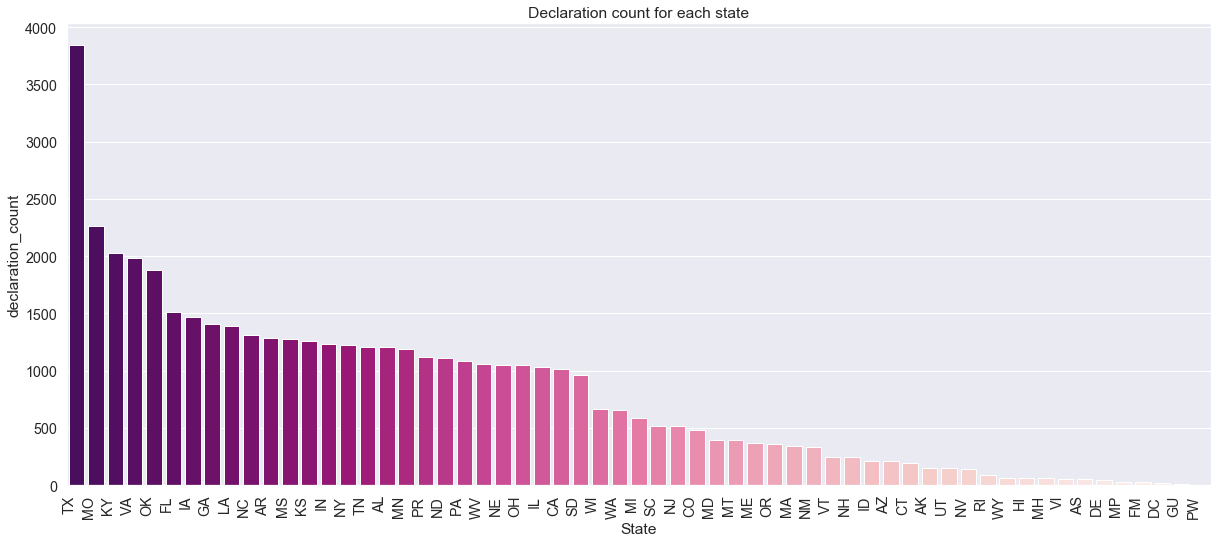

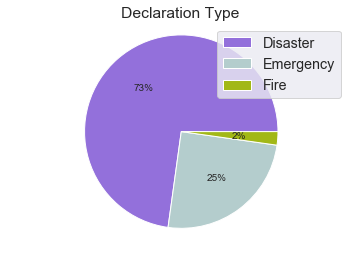

In [10]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.3)


# Plot the declaration count for each state . 
# Think of a way to nicely visualize all the states! 
#########################begin code 

scount=df_data.groupby('State').size().to_frame('declaration_count').reset_index().sort_values(['declaration_count'],ascending=[False])
plt.subplots(figsize = (20.5,8.5))
ac=sns.barplot(y="declaration_count", x="State", data=scount, palette="RdPu_r",).set_title('Declaration count for each state')
plt.xticks(rotation=90,horizontalalignment='right')


#########################end code 


#  Draw a pie chart that represents Declaration type.
#########################begin code
dtcount=df_data.groupby('Declaration Type').size().to_frame('declarationtype_count').reset_index().sort_values(['declarationtype_count'],ascending=[False])
fig,a = plt.subplots()
a.pie(dtcount['declarationtype_count'],colors=['#9370DB','#B4CDCD','#a2b817'],textprops={'fontsize' :10},autopct='%1.0f%%')
a.axis('equal')
a.legend(dtcount['Declaration Type'])
plt.title('Declaration Type')
plt.show()
#########################end code

# Task 4: 
Find out an 'interesting' information from the dataset. Create a visualization for it and explain in a few lines your reasoning. 

This task is worth 20 points. Your result will be judged based on the uniqueness and quality of your work (having a meaningful result and an aesthetic visualization). 

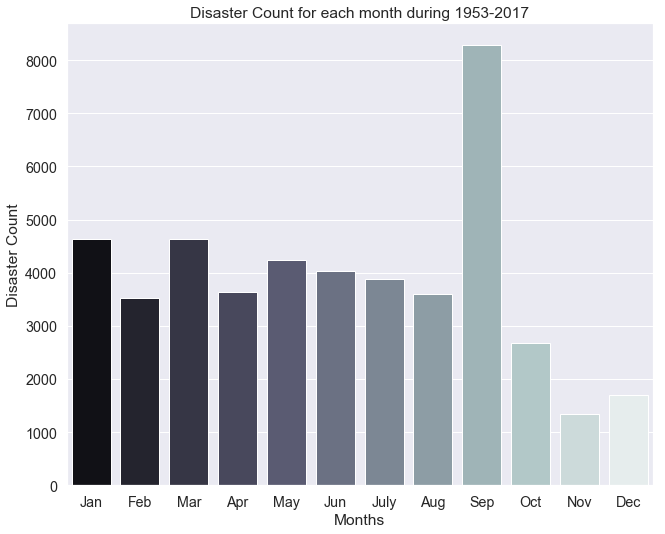

In [11]:
#########################begin code 
#Calculating Disaster count for each month during 1953-2017

#storing the month values from declaration dates  
df_data['month'] = pd.DatetimeIndex(df_data['Declaration Date']).month
d=df_data[['Disaster Type', 'month']]
#sorting the values based on the disaster count
dcount=d.groupby('month').size().to_frame('Disaster Count').reset_index().sort_values(['Disaster Count'],ascending=[False])
plt.subplots(figsize = (10.5,8.5))
ax = dcount.sort_values(['month'])
#assigning corresponding month names to the month values
ax['Months']=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']
#plotting the barplot for disaster count and months
sns.barplot(y="Disaster Count", x="Months", data=ax, palette="bone").set_title('Disaster Count for each month during 1953-2017')
plt.show()

#########################end code 

Observation :
The graph above gives us information on the relation between the number of disasters and the months in which they occured during the years 1953-2017. From the above graph we can say that the maximum number of disasters occured in the month of September. The lowest number of disasters took place in the month of November. It can also be observed that there is a decrease in the occurence of the disasters during May to August. There is a sudden rise and dip later on in the months September to November. Overall we can conclude that the disasters during the period 1953-2017 occured from the beginning of the year to mid year and there is a decrease by the end of the year.